In [1]:
from scipy.io import loadmat
from scipy.signal import butter, filtfilt
from scipy import interpolate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.metrics import accuracy_score
from scipy.fft import fft


In [2]:
data = loadmat("subject_2.mat")
subject = data["subject"]
emg = data["emg"]
stimulus = data["stimulus"]
stimulus = np.transpose(stimulus)

stimulus.shape

(16784, 1)

In [3]:
# Create a DataFrame from the emg array
df_1_time = pd.DataFrame(emg)

# Add the subject and stimulus columns to the DataFrame
df_1_time['stimulus'] = stimulus[:, 0]

df_1_time.head()

,0,1,2,3,4,5,6,7,8,9,stimulus
0,0.027054,-0.076287,-0.058222,0.148054,-0.020103,0.003629,-0.084009,-0.011359,-0.084841,-0.057762,0
1,0.030266,-0.060370,-0.055418,0.130650,0.019779,-0.003098,-0.062383,0.001920,-0.101609,-0.053038,0
2,0.031540,-0.062843,-0.065212,0.102853,0.061320,-0.018397,-0.023044,0.004446,-0.105946,-0.024739,0
3,0.030271,-0.081764,-0.090538,0.069528,0.094186,-0.038248,0.035276,0.017802,-0.108747,0.012346,0
4,-0.001542,-0.106352,-0.115518,0.035905,0.110237,-0.056386,0.096810,-0.000826,-0.113395,0.036293,0


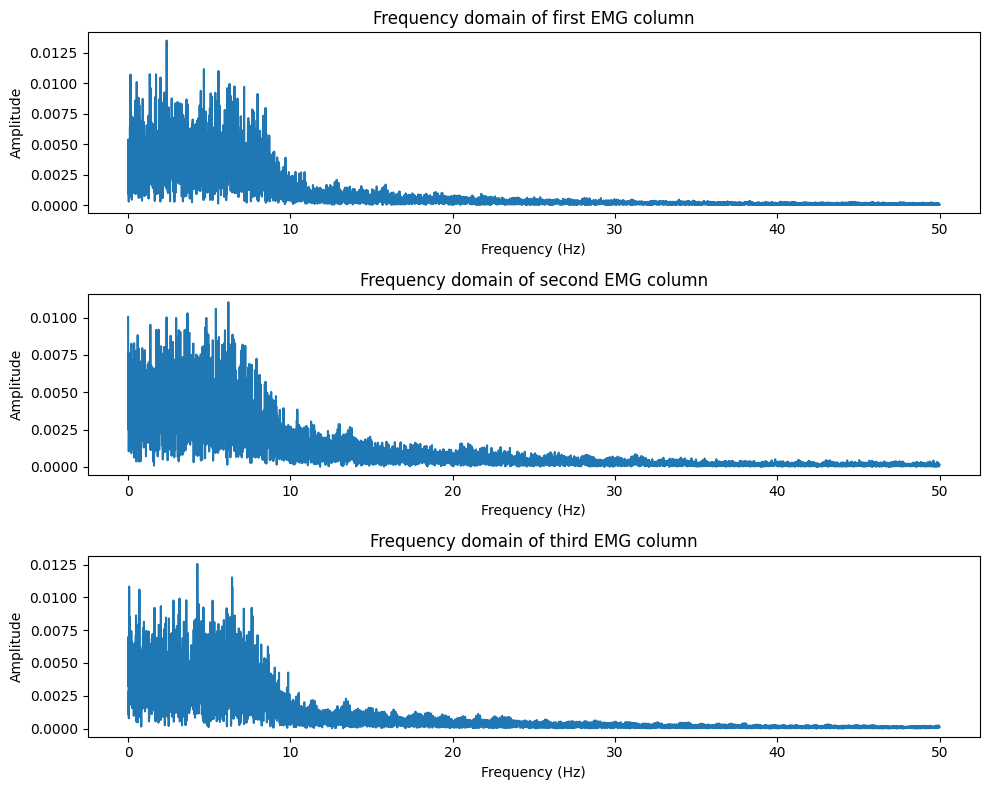

In [4]:
from scipy.fft import fft, fftfreq

# Number of samples
N = len(df_1_time)

# Sample spacing
T = 1.0 / 100.0  # Assuming the sampling frequency is 100 Hz

# Perform FFT on the first 3 columns of the DataFrame
yf_0 = fft(df_1_time.iloc[:, 0])
yf_1 = fft(df_1_time.iloc[:, 1])
yf_2 = fft(df_1_time.iloc[:, 2])

# Generate the frequency axis
xf = fftfreq(N, T)[:N//2]

# Plot the FFT results
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(xf, 2.0/N * np.abs(yf_0[:N//2]))
plt.title('Frequency domain of first EMG column')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(xf, 2.0/N * np.abs(yf_1[:N//2]))
plt.title('Frequency domain of second EMG column')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(xf, 2.0/N * np.abs(yf_2[:N//2]))
plt.title('Frequency domain of third EMG column')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [5]:
def apply_high_pass_filter(data, order=8):
    cutoff = 10
    fs = 100
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

In [6]:
df_1_time_filter = df_1_time.copy()
for i in range(0, 10):
    df_1_time_filter[i] = apply_high_pass_filter(df_1_time[i])

In [7]:
df_1_time_filter.head()

,0,1,2,3,4,5,6,7,8,9,stimulus
0,0.000139,0.000055,0.000087,0.001041,0.000374,-0.001147,-0.000267,0.000727,-0.000498,-0.000204,0
1,0.012820,0.025039,0.028241,0.011024,-0.010904,0.011706,-0.012365,-0.006561,-0.007596,-0.021154,0
2,0.023353,0.031186,0.040620,0.010872,-0.011725,0.015161,-0.013037,-0.015046,-0.002983,-0.018202,0
3,0.030745,0.019710,0.030525,0.005565,-0.005727,0.011369,-0.004419,0.003885,0.001897,-0.005477,0
4,0.006423,0.000043,0.009249,-0.000563,0.002032,0.004108,-0.000578,0.009664,0.003610,-0.003485,0


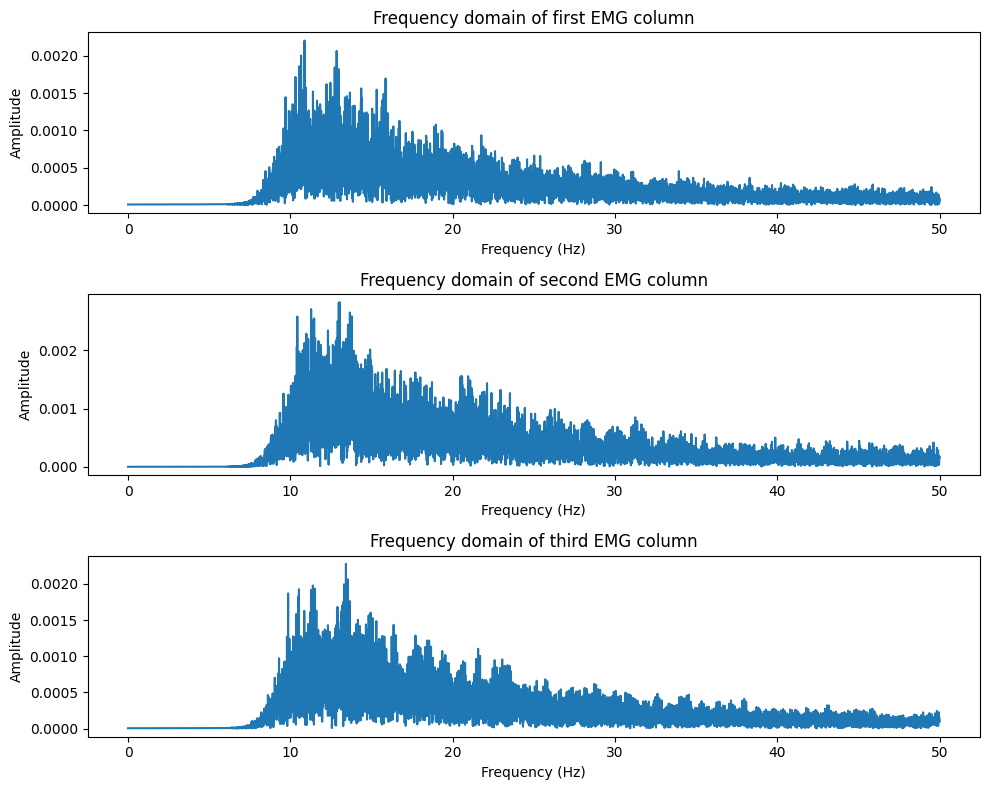

In [8]:
from scipy.fft import fft, fftfreq

# Number of samples
N = len(df_1_time)

# Sample spacing
T = 1.0 / 100.0  # Assuming the sampling frequency is 100 Hz

# Perform FFT on the first 3 columns of the DataFrame
yf_0 = fft(df_1_time_filter.iloc[:, 0])
yf_1 = fft(df_1_time_filter.iloc[:, 1])
yf_2 = fft(df_1_time_filter.iloc[:, 2])

# Generate the frequency axis
xf = fftfreq(N, T)[:N//2]

# Plot the FFT results
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(xf, 2.0/N * np.abs(yf_0[:N//2]))
plt.title('Frequency domain of first EMG column')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(xf, 2.0/N * np.abs(yf_1[:N//2]))
plt.title('Frequency domain of second EMG column')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(xf, 2.0/N * np.abs(yf_2[:N//2]))
plt.title('Frequency domain of third EMG column')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [9]:
# from scipy.fft import fft

# # Apply FFT to each column except the 'stimulus' column
# df_1_freq = df_1_time_filter.drop(columns=['stimulus']).apply(fft)

# # Add the 'stimulus' column back to the DataFrame
# df_1_freq['stimulus'] = df_1_time['stimulus']

# df_1_freq.head()


In [10]:
# for col in df_1_freq.columns:
#     if col != 'stimulus':
#         df_1_freq[col] = np.abs(df_1_freq[col])
        
# df_1_combined = pd.concat([df_1_time_filter.drop(columns=['stimulus']), df_1_freq], axis=1)

# df_1_combined.head()
# df_1_combined.shape

## Normalize and Standardize

In [11]:


# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()
# standard = StandardScaler()

# # Normalize the data except the 'stimulus' column
# # df_1_combined_normalized = df_1_combined.copy()
# # df_1_combined_normalized.iloc[:, :-1] = scaler.fit_transform(df_1_combined.iloc[:, :-1])


# df_1_time_filter_normalized = df_1_time_filter.copy()
# df_1_time_filter_normalized.iloc[:, :-1] = scaler.fit_transform(df_1_time_filter.iloc[:, :-1])

# df_1_freq_normalized = df_1_freq.copy()
# df_1_freq_normalized.iloc[:, :-1] = scaler.fit_transform(df_1_freq.iloc[:, :-1])

# # df_1_combined_standard = df_1_combined.copy()
# # df_1_combined_standard.iloc[:, :-1] = standard.fit_transform(df_1_combined.iloc[:, :-1])

# df_1_time_filter_standard = df_1_time_filter.copy()
# df_1_time_filter_standard.iloc[:, :-1] = standard.fit_transform(df_1_time_filter.iloc[:, :-1])

# df_1_freq_standard = df_1_freq.copy()
# df_1_freq_standard.iloc[:, :-1] = standard.fit_transform(df_1_freq.iloc[:, :-1])



### Segmenting all the dataframes and removing zero segments

In [12]:
# Segmenting all the dataframes

def segment_data(df):
    segments = []
    current_segment = []
    y = df['stimulus']
    current_label = y.iloc[0]

    for index, label in y.items():
        if label == current_label:
            current_segment.append(index)
        else:
            segments.append(df.loc[current_segment])
            current_segment = [index]
            current_label = label

    # Append the last segment
    if current_segment:
        segments.append(df.loc[current_segment])

    # Filter segments to keep only those with odd indices
    segments = [segment for i, segment in enumerate(segments) if i % 2 != 0]
    return segments

# Apply the function to each DataFrame
# segments_combined_normalized = segment_data(df_1_combined_normalized)
segments_time_filter = segment_data(df_1_time_filter)
# segments_freq = segment_data(df_1_time_filter)
# segments_combined_standard = segment_data(df_1_combined_standard)
# segments_time_filter_standard = segment_data(df_1_time_filter_standard)
# segments_freq_standard = segment_data(df_1_time_filter)
# Apply FFT to each segment in segments_freq_standard
segments_freq = [segment.drop(columns=['stimulus']).apply(lambda x: np.abs(fft(x))).assign(stimulus=segment['stimulus'].values) for segment in segments_time_filter]


# Print the lengths of the segments for verification
# for segment in segments_combined_normalized:
#     print(len(segment))   
# len(segments_time_filter_normalized)

### Training the time domain normalized

In [13]:
# Function to combine features and labels for KNN
def prepare_data_from_segments(segments, segmentLabel):
    X = pd.concat([seg for seg in segments], axis=0)
    y = pd.concat([seg for seg in segmentLabel], axis=0)
    return X, y

best_accuracy = 0
best_i = 0
best_k = 0

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Train and evaluate KNN models with k from 1 to 19 using Leave-One-Out cross-validation on segments
for j in range(0, 10):
    accuracies = []
    for k in range(1, 20):
        knn = KNN(n_neighbors=k)
        y_true, y_pred = [], []

        for leave_out_index in range(len(segments_time_filter)):
            # Leave one segment out

            train_segments = [
                segments_time_filter[i][j]
                for i in range(len(segments_time_filter))
                if i != leave_out_index
            ]
            train_segments_label = [
                segments_time_filter[i]['stimulus']
                for i in range(len(segments_time_filter))
                if i != leave_out_index
            ]
            test_segment = segments_time_filter[leave_out_index][j]
            test_segment_label = segments_time_filter[leave_out_index]['stimulus']

            # Prepare training and testing data
            X_train, y_train = prepare_data_from_segments(train_segments, train_segments_label)
            X_test, y_test_segment = prepare_data_from_segments([test_segment], [test_segment_label])
            X_train = pd.DataFrame(X_train)
            X_test = pd.DataFrame(X_test)

            # Normalize the training data as a whole
            X_train.columns = X_train.columns.astype(str)
            X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

            # Normalize the testing data alone
            X_test.columns = X_test.columns.astype(str)
            X_test = pd.DataFrame(scaler.transform(X_test))
            X_new = pd.DataFrame()
            y_new = pd.DataFrame()

            for i in range(len(segments_time_filter)):
                if i == leave_out_index:
                    continue
                segment_length = len(segments_time_filter[i])
                before = sum(len(segments_time_filter[j]) for j in range(i) if j != leave_out_index)
                X_new = pd.concat([X_new, X_train.iloc[before:before + segment_length][f'{j}'].to_frame().transpose()], axis=0, ignore_index=True)
                if segment_length > X_new.shape[1]:
                    X_new = X_new.reindex(columns=range(segment_length), fill_value=0)
                y_new = pd.concat([y_new, pd.DataFrame([segments_time_filter[i]['stimulus'].iloc[0]], dtype=np.int8)], axis=0, ignore_index=True)
            # Replace null or NaN values in X_new with 0 (padding)
            X_new.fillna(0, inplace=True)
            # print(f"Largest width of X_new: {X_new.shape[1]}")
            # print(f"Largest width of all segments: {max(segment.shape[0] for segment in segments_time_filter)}")
            # print(X_new)
            X_new_test = pd.DataFrame(X_test.iloc[0].to_frame().transpose())
            if X_new_test.shape[1] < X_new.shape[1]:
                X_new_test = X_new_test.reindex(columns=range(X_new.shape[1]), fill_value=0)
            if X_new_test.shape[1] > X_new.shape[1]:
                X_new = X_new.reindex(columns=range(X_new_test.shape[1]), fill_value=0)
            y_new_test = pd.DataFrame([test_segment_label.iloc[0]], dtype=np.int8)
            # print("Test: ",y_new_test)
            

            # Train and test the model
            knn.fit(X_new, y_new.values.ravel())
            y_pred_segment = knn.predict(X_new_test)
            y_pred.extend(y_pred_segment)
            y_true.extend(y_new_test.values.ravel())

        # Calculate accuracy for the current k
        accuracy = accuracy_score(y_true, y_pred)
        accuracies.append((k, accuracy))

        # Update best accuracy, i, and k
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_i = j
            best_k = k

    # Print the accuracies
    for k, accuracy in accuracies:
        print(f'i = {j}, k={k}, accuracy={accuracy:.4f}')

# Print the best accuracy, i, and k
print(f'Best accuracy: {best_accuracy:.4f} with i = {best_i} and k = {best_k}')


i = 0, k=1, accuracy=0.5000
i = 0, k=2, accuracy=0.5000
i = 0, k=3, accuracy=0.4000
i = 0, k=4, accuracy=0.5000
i = 0, k=5, accuracy=0.5000
i = 0, k=6, accuracy=0.5000
i = 0, k=7, accuracy=0.5000
i = 0, k=8, accuracy=0.5000
i = 0, k=9, accuracy=0.5000
i = 0, k=10, accuracy=0.5000
i = 0, k=11, accuracy=0.5000
i = 0, k=12, accuracy=0.5000
i = 0, k=13, accuracy=0.5000
i = 0, k=14, accuracy=0.5000
i = 0, k=15, accuracy=0.5000
i = 0, k=16, accuracy=0.5000
i = 0, k=17, accuracy=0.5000
i = 0, k=18, accuracy=0.5000
i = 0, k=19, accuracy=0.0000
i = 1, k=1, accuracy=0.5000
i = 1, k=2, accuracy=0.5000
i = 1, k=3, accuracy=0.5000
i = 1, k=4, accuracy=0.5000
i = 1, k=5, accuracy=0.5000
i = 1, k=6, accuracy=0.5000
i = 1, k=7, accuracy=0.5000
i = 1, k=8, accuracy=0.5000
i = 1, k=9, accuracy=0.5000
i = 1, k=10, accuracy=0.5000
i = 1, k=11, accuracy=0.5000
i = 1, k=12, accuracy=0.5000
i = 1, k=13, accuracy=0.5000
i = 1, k=14, accuracy=0.5000
i = 1, k=15, accuracy=0.5000
i = 1, k=16, accuracy=0.5000
i =

### Training Time Domain Standardlized

In [14]:
# Function to combine features and labels for KNN
def prepare_data_from_segments(segments, segmentLabel):
    X = pd.concat([seg for seg in segments], axis=0)
    y = pd.concat([seg for seg in segmentLabel], axis=0)
    return X, y

best_accuracy = 0
best_i = 0
best_k = 0

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Train and evaluate KNN models with k from 1 to 19 using Leave-One-Out cross-validation on segments
for j in range(0, 10):
    accuracies = []
    for k in range(1, 20):
        knn = KNN(n_neighbors=k)
        y_true, y_pred = [], []

        for leave_out_index in range(len(segments_time_filter)):
            # Leave one segment out

            train_segments = [
                segments_time_filter[i][j]
                for i in range(len(segments_time_filter))
                if i != leave_out_index
            ]
            train_segments_label = [
                segments_time_filter[i]['stimulus']
                for i in range(len(segments_time_filter))
                if i != leave_out_index
            ]
            test_segment = segments_time_filter[leave_out_index][j]
            test_segment_label = segments_time_filter[leave_out_index]['stimulus']

            # Prepare training and testing data
            X_train, y_train = prepare_data_from_segments(train_segments, train_segments_label)
            X_test, y_test_segment = prepare_data_from_segments([test_segment], [test_segment_label])
            X_train = pd.DataFrame(X_train)
            X_test = pd.DataFrame(X_test)

            # Normalize the training data as a whole
            X_train.columns = X_train.columns.astype(str)
            X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

            # Normalize the testing data alone
            X_test.columns = X_test.columns.astype(str)
            X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
            X_new = pd.DataFrame()
            y_new = pd.DataFrame()

            for i in range(len(segments_time_filter)):
                if i == leave_out_index:
                    continue
                segment_length = len(segments_time_filter[i])
                before = sum(len(segments_time_filter[j]) for j in range(i) if j != leave_out_index)
                X_new = pd.concat([X_new, X_train.iloc[before:before + segment_length][f'{j}'].to_frame().transpose()], axis=0, ignore_index=True)
                if segment_length > X_new.shape[1]:
                    X_new = X_new.reindex(columns=range(segment_length), fill_value=0)
                y_new = pd.concat([y_new, pd.DataFrame([segments_time_filter[i]['stimulus'].iloc[0]], dtype=np.int8)], axis=0, ignore_index=True)
            # Replace null or NaN values in X_new with 0 (padding)
            X_new.fillna(0, inplace=True)
            # print(f"Largest width of X_new: {X_new.shape[1]}")
            # print(f"Largest width of all segments: {max(segment.shape[0] for segment in segments_time_filter)}")
            # print(X_new)
            X_new_test = pd.DataFrame(X_test.iloc[0].to_frame().transpose())
            if X_new_test.shape[1] < X_new.shape[1]:
                X_new_test = X_new_test.reindex(columns=range(X_new.shape[1]), fill_value=0)
            if X_new_test.shape[1] > X_new.shape[1]:
                X_new = X_new.reindex(columns=range(X_new_test.shape[1]), fill_value=0)
            y_new_test = pd.DataFrame([test_segment_label.iloc[0]], dtype=np.int8)
            # print("Test: ",y_new_test)
            

            # Train and test the model
            knn.fit(X_new, y_new.values.ravel())
            y_pred_segment = knn.predict(X_new_test)
            y_pred.extend(y_pred_segment)
            y_true.extend(y_new_test.values.ravel())

        # Calculate accuracy for the current k
        accuracy = accuracy_score(y_true, y_pred)
        accuracies.append((k, accuracy))

        # Update best accuracy, i, and k
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_i = j
            best_k = k

    # Print the accuracies
    for k, accuracy in accuracies:
        print(f'i = {j}, k={k}, accuracy={accuracy:.4f}')

# Print the best accuracy, i, and k
print(f'Best accuracy: {best_accuracy:.4f} with i = {best_i} and k = {best_k}')


i = 0, k=1, accuracy=0.4500
i = 0, k=2, accuracy=0.5000
i = 0, k=3, accuracy=0.5000
i = 0, k=4, accuracy=0.5000
i = 0, k=5, accuracy=0.5000
i = 0, k=6, accuracy=0.5000
i = 0, k=7, accuracy=0.5000
i = 0, k=8, accuracy=0.5000
i = 0, k=9, accuracy=0.5000
i = 0, k=10, accuracy=0.5000
i = 0, k=11, accuracy=0.5000
i = 0, k=12, accuracy=0.5000
i = 0, k=13, accuracy=0.5000
i = 0, k=14, accuracy=0.5000
i = 0, k=15, accuracy=0.5000
i = 0, k=16, accuracy=0.5000
i = 0, k=17, accuracy=0.5000
i = 0, k=18, accuracy=0.5000
i = 0, k=19, accuracy=0.0000
i = 1, k=1, accuracy=0.5000
i = 1, k=2, accuracy=0.5000
i = 1, k=3, accuracy=0.5000
i = 1, k=4, accuracy=0.5000
i = 1, k=5, accuracy=0.5000
i = 1, k=6, accuracy=0.5000
i = 1, k=7, accuracy=0.5000
i = 1, k=8, accuracy=0.5000
i = 1, k=9, accuracy=0.5000
i = 1, k=10, accuracy=0.5000
i = 1, k=11, accuracy=0.5000
i = 1, k=12, accuracy=0.5000
i = 1, k=13, accuracy=0.5000
i = 1, k=14, accuracy=0.5000
i = 1, k=15, accuracy=0.5000
i = 1, k=16, accuracy=0.5000
i =

### Frequency Domain Standarized

In [15]:
# Function to combine features and labels for KNN
def prepare_data_from_segments(segments, segmentLabel):
    X = pd.concat([seg for seg in segments], axis=0)
    y = pd.concat([seg for seg in segmentLabel], axis=0)
    return X, y

best_accuracy = 0
best_i = 0
best_k = 0

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Train and evaluate KNN models with k from 1 to 19 using Leave-One-Out cross-validation on segments
for j in range(0, 10):
    accuracies = []
    for k in range(1, 20):
        knn = KNN(n_neighbors=k)
        y_true, y_pred = [], []

        for leave_out_index in range(len(segments_freq)):
            # Leave one segment out

            train_segments = [
                segments_freq[i][j]
                for i in range(len(segments_freq))
                if i != leave_out_index
            ]
            train_segments_label = [
                segments_freq[i]['stimulus']
                for i in range(len(segments_freq))
                if i != leave_out_index
            ]
            test_segment = segments_freq[leave_out_index][j]
            test_segment_label = segments_freq[leave_out_index]['stimulus']

            # Prepare training and testing data
            X_train, y_train = prepare_data_from_segments(train_segments, train_segments_label)
            X_test, y_test_segment = prepare_data_from_segments([test_segment], [test_segment_label])
            X_train = pd.DataFrame(X_train)
            X_test = pd.DataFrame(X_test)

            # Normalize the training data as a whole
            X_train.columns = X_train.columns.astype(str)
            X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

            # Normalize the testing data alone
            X_test.columns = X_test.columns.astype(str)
            X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
            X_new = pd.DataFrame()
            y_new = pd.DataFrame()

            for i in range(len(segments_freq)):
                if i == leave_out_index:
                    continue
                segment_length = len(segments_freq[i])
                before = sum(len(segments_freq[j]) for j in range(i) if j != leave_out_index)
                X_new = pd.concat([X_new, X_train.iloc[before:before + segment_length][f'{j}'].to_frame().transpose()], axis=0, ignore_index=True)
                if segment_length > X_new.shape[1]:
                    X_new = X_new.reindex(columns=range(segment_length), fill_value=0)
                y_new = pd.concat([y_new, pd.DataFrame([segments_freq[i]['stimulus'].iloc[0]], dtype=np.int8)], axis=0, ignore_index=True)
            # Replace null or NaN values in X_new with 0 (padding)
            X_new.fillna(0, inplace=True)
            # print(f"Largest width of X_new: {X_new.shape[1]}")
            # print(f"Largest width of all segments: {max(segment.shape[0] for segment in segments_time_filter)}")
            # print(X_new)
            X_new_test = pd.DataFrame(X_test.iloc[0].to_frame().transpose())
            if X_new_test.shape[1] < X_new.shape[1]:
                X_new_test = X_new_test.reindex(columns=range(X_new.shape[1]), fill_value=0)
            if X_new_test.shape[1] > X_new.shape[1]:
                X_new = X_new.reindex(columns=range(X_new_test.shape[1]), fill_value=0)
            y_new_test = pd.DataFrame([test_segment_label.iloc[0]], dtype=np.int8)
            # print("Test: ",y_new_test)
            

            # Train and test the model
            knn.fit(X_new, y_new.values.ravel())
            y_pred_segment = knn.predict(X_new_test)
            y_pred.extend(y_pred_segment)
            y_true.extend(y_new_test.values.ravel())

        # Calculate accuracy for the current k
        accuracy = accuracy_score(y_true, y_pred)
        accuracies.append((k, accuracy))

        # Update best accuracy, i, and k
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_i = j
            best_k = k

    # Print the accuracies
    for k, accuracy in accuracies:
        print(f'i = {j}, k={k}, accuracy={accuracy:.4f}')

# Print the best accuracy, i, and k
print(f'Best accuracy: {best_accuracy:.4f} with i = {best_i} and k = {best_k}')


i = 0, k=1, accuracy=0.4500
i = 0, k=2, accuracy=0.5000
i = 0, k=3, accuracy=0.5000
i = 0, k=4, accuracy=0.5000
i = 0, k=5, accuracy=0.5000
i = 0, k=6, accuracy=0.5000
i = 0, k=7, accuracy=0.5000
i = 0, k=8, accuracy=0.5000
i = 0, k=9, accuracy=0.5000
i = 0, k=10, accuracy=0.5000
i = 0, k=11, accuracy=0.5000
i = 0, k=12, accuracy=0.5000
i = 0, k=13, accuracy=0.5000
i = 0, k=14, accuracy=0.5000
i = 0, k=15, accuracy=0.5000
i = 0, k=16, accuracy=0.5000
i = 0, k=17, accuracy=0.5000
i = 0, k=18, accuracy=0.5000
i = 0, k=19, accuracy=0.0000
i = 1, k=1, accuracy=0.5000
i = 1, k=2, accuracy=0.5000
i = 1, k=3, accuracy=0.5000
i = 1, k=4, accuracy=0.5000
i = 1, k=5, accuracy=0.5000
i = 1, k=6, accuracy=0.5000
i = 1, k=7, accuracy=0.5000
i = 1, k=8, accuracy=0.5000
i = 1, k=9, accuracy=0.5000
i = 1, k=10, accuracy=0.5000
i = 1, k=11, accuracy=0.5000
i = 1, k=12, accuracy=0.5000
i = 1, k=13, accuracy=0.5000
i = 1, k=14, accuracy=0.5000
i = 1, k=15, accuracy=0.5000
i = 1, k=16, accuracy=0.5000
i =

### Frequency Domain Normalized

In [16]:
# Function to combine features and labels for KNN
def prepare_data_from_segments(segments, segmentLabel):
    X = pd.concat([seg for seg in segments], axis=0)
    y = pd.concat([seg for seg in segmentLabel], axis=0)
    return X, y

best_accuracy = 0
best_i = 0
best_k = 0

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Train and evaluate KNN models with k from 1 to 19 using Leave-One-Out cross-validation on segments
for j in range(0, 10):
    accuracies = []
    for k in range(1, 20):
        knn = KNN(n_neighbors=k)
        y_true, y_pred = [], []

        for leave_out_index in range(len(segments_freq)):
            # Leave one segment out

            train_segments = [
                segments_freq[i][j]
                for i in range(len(segments_freq))
                if i != leave_out_index
            ]
            train_segments_label = [
                segments_freq[i]['stimulus']
                for i in range(len(segments_freq))
                if i != leave_out_index
            ]
            test_segment = segments_freq[leave_out_index][j]
            test_segment_label = segments_freq[leave_out_index]['stimulus']

            # Prepare training and testing data
            X_train, y_train = prepare_data_from_segments(train_segments, train_segments_label)
            X_test, y_test_segment = prepare_data_from_segments([test_segment], [test_segment_label])
            X_train = pd.DataFrame(X_train)
            X_test = pd.DataFrame(X_test)

            # Normalize the training data as a whole
            X_train.columns = X_train.columns.astype(str)
            X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

            # Normalize the testing data alone
            X_test.columns = X_test.columns.astype(str)
            X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
            X_new = pd.DataFrame()
            y_new = pd.DataFrame()

            for i in range(len(segments_freq)):
                if i == leave_out_index:
                    continue
                segment_length = len(segments_freq[i])
                before = sum(len(segments_freq[j]) for j in range(i) if j != leave_out_index)
                X_new = pd.concat([X_new, X_train.iloc[before:before + segment_length][f'{j}'].to_frame().transpose()], axis=0, ignore_index=True)
                if segment_length > X_new.shape[1]:
                    X_new = X_new.reindex(columns=range(segment_length), fill_value=0)
                y_new = pd.concat([y_new, pd.DataFrame([segments_freq[i]['stimulus'].iloc[0]], dtype=np.int8)], axis=0, ignore_index=True)
            # Replace null or NaN values in X_new with 0 (padding)
            X_new.fillna(0, inplace=True)
            # print(f"Largest width of X_new: {X_new.shape[1]}")
            # print(f"Largest width of all segments: {max(segment.shape[0] for segment in segments_time_filter)}")
            # print(X_new)
            X_new_test = pd.DataFrame(X_test.iloc[0].to_frame().transpose())
            if X_new_test.shape[1] < X_new.shape[1]:
                X_new_test = X_new_test.reindex(columns=range(X_new.shape[1]), fill_value=0)
            if X_new_test.shape[1] > X_new.shape[1]:
                X_new = X_new.reindex(columns=range(X_new_test.shape[1]), fill_value=0)
            y_new_test = pd.DataFrame([test_segment_label.iloc[0]], dtype=np.int8)
            # print("Test: ",y_new_test)
            

            # Train and test the model
            knn.fit(X_new, y_new.values.ravel())
            y_pred_segment = knn.predict(X_new_test)
            y_pred.extend(y_pred_segment)
            y_true.extend(y_new_test.values.ravel())

        # Calculate accuracy for the current k
        accuracy = accuracy_score(y_true, y_pred)
        accuracies.append((k, accuracy))

        # Update best accuracy, i, and k
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_i = j
            best_k = k

    # Print the accuracies
    for k, accuracy in accuracies:
        print(f'i = {j}, k={k}, accuracy={accuracy:.4f}')

# Print the best accuracy, i, and k
print(f'Best accuracy: {best_accuracy:.4f} with i = {best_i} and k = {best_k}')


i = 0, k=1, accuracy=0.4500
i = 0, k=2, accuracy=0.5000
i = 0, k=3, accuracy=0.5000
i = 0, k=4, accuracy=0.5000
i = 0, k=5, accuracy=0.5000
i = 0, k=6, accuracy=0.5000
i = 0, k=7, accuracy=0.5000
i = 0, k=8, accuracy=0.5000
i = 0, k=9, accuracy=0.5000
i = 0, k=10, accuracy=0.5000
i = 0, k=11, accuracy=0.5000
i = 0, k=12, accuracy=0.5000
i = 0, k=13, accuracy=0.5000
i = 0, k=14, accuracy=0.5000
i = 0, k=15, accuracy=0.5000
i = 0, k=16, accuracy=0.5000
i = 0, k=17, accuracy=0.5000
i = 0, k=18, accuracy=0.5000
i = 0, k=19, accuracy=0.0000
i = 1, k=1, accuracy=0.5000
i = 1, k=2, accuracy=0.5000
i = 1, k=3, accuracy=0.5000
i = 1, k=4, accuracy=0.5000
i = 1, k=5, accuracy=0.5000
i = 1, k=6, accuracy=0.5000
i = 1, k=7, accuracy=0.5000
i = 1, k=8, accuracy=0.5000
i = 1, k=9, accuracy=0.5000
i = 1, k=10, accuracy=0.5000
i = 1, k=11, accuracy=0.5000
i = 1, k=12, accuracy=0.5000
i = 1, k=13, accuracy=0.5000
i = 1, k=14, accuracy=0.5000
i = 1, k=15, accuracy=0.5000
i = 1, k=16, accuracy=0.5000
i =

### Combined Normalized

In [17]:
# Function to combine features and labels for KNN
def prepare_data_from_segments(segments, segmentLabel):
    X = pd.concat([seg for seg in segments], axis=0)
    y = pd.concat([seg for seg in segmentLabel], axis=0)
    return X, y

best_accuracy = 0
best_i = 0
best_k = 0

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Train and evaluate KNN models with k from 1 to 19 using Leave-One-Out cross-validation on segments
for j in range(0, 10):
    accuracies = []
    for k in range(1, 20):
        knn = KNN(n_neighbors=k)
        y_true, y_pred = [], []

        for leave_out_index in range(len(segments_freq)):
            # Leave one segment out

            train_segments_freq = [
                segments_freq[i][j]
                for i in range(len(segments_freq))
                if i != leave_out_index
            ]
            train_segments_label_freq = [
                segments_freq[i]['stimulus']
                for i in range(len(segments_freq))
                if i != leave_out_index
            ]
            test_segment_freq = segments_freq[leave_out_index][j]
            test_segment_label_freq = segments_freq[leave_out_index]['stimulus']

            # Prepare training and testing data
            X_train_freq, y_train_freq = prepare_data_from_segments(train_segments_freq, train_segments_label_freq)
            X_test_freq, y_test_segment_freq = prepare_data_from_segments([test_segment_freq], [test_segment_label_freq])
            X_train_freq = pd.DataFrame(X_train_freq)
            X_test_freq = pd.DataFrame(X_test_freq)

            train_segments_time = [
                segments_time_filter[i][j]
                for i in range(len(segments_time_filter))
                if i != leave_out_index
            ]
            train_segments_label_time = [
                segments_time_filter[i]['stimulus']
                for i in range(len(segments_time_filter))
                if i != leave_out_index
            ]
            test_segment_time = segments_time_filter[leave_out_index][j]
            test_segment_label_time = segments_time_filter[leave_out_index]['stimulus']

            # Prepare training and testing data
            X_train_time, y_train_time = prepare_data_from_segments(train_segments_time, train_segments_label_time)
            X_test_time, y_test_segment_time = prepare_data_from_segments([test_segment_time], [test_segment_label_time])
            X_train_time = pd.DataFrame(X_train_time)
            X_test_time = pd.DataFrame(X_test_time)

            # Normalize the training data as a whole
            X_train_freq.columns = X_train_freq.columns.astype(str)
            X_train = pd.DataFrame(scaler.fit_transform(X_train_freq), columns=X_train_freq.columns)

            # Normalize the testing data alone
            X_test_freq.columns = X_test_freq.columns.astype(str)
            X_test_freq = pd.DataFrame(scaler.transform(X_test_freq), columns=X_test_freq.columns)

            # Normalize the training data as a whole
            X_train_time.columns = X_train_time.columns.astype(str)
            X_train_time = pd.DataFrame(scaler.fit_transform(X_train_time), columns=X_train_time.columns)

            # Normalize the testing data alone
            X_test_time.columns = X_test_time.columns.astype(str)
            X_test_time = pd.DataFrame(scaler.transform(X_test_time), columns=X_test_time.columns)

            X_new = pd.DataFrame()
            y_new = pd.DataFrame()

            for i in range(len(segments_freq)):
                if i == leave_out_index:
                    continue
                segment_length = len(segments_freq[i])
                before = sum(len(segments_freq[j]) for j in range(i) if j != leave_out_index)
                X_new = pd.concat([X_new, pd.concat([X_train_freq.iloc[before:before + segment_length][f'{j}'].to_frame().transpose(),X_train_time.iloc[before:before + segment_length][f'{j}'].to_frame().transpose()], axis=1, ignore_index=True )], axis=0, ignore_index=True)
                if segment_length > X_new.shape[1]:
                    X_new = X_new.reindex(columns=range(segment_length), fill_value=0)
                y_new = pd.concat([y_new, pd.DataFrame([segments_freq[i]['stimulus'].iloc[0]], dtype=np.int8)], axis=0, ignore_index=True)
            # Replace null or NaN values in X_new with 0 (padding)
            X_new.fillna(0, inplace=True)
            # print(f"Largest width of X_new: {X_new.shape[1]}")
            # print(f"Largest width of all segments: {max(segment.shape[0] for segment in segments_time_filter)}")
            # print(X_new)
            X_new_test = pd.DataFrame(pd.concat([X_test_freq.iloc[0].to_frame().transpose(),X_test_time.iloc[0].to_frame().transpose()], axis=1, ignore_index=True))
            if X_new_test.shape[1] < X_new.shape[1]:
                X_new_test = X_new_test.reindex(columns=range(X_new.shape[1]), fill_value=0)
            if X_new_test.shape[1] > X_new.shape[1]:
                X_new = X_new.reindex(columns=range(X_new_test.shape[1]), fill_value=0)
            y_new_test = pd.DataFrame([test_segment_label.iloc[0]], dtype=np.int8)
            # print("Test: ",y_new_test)
            

            # Train and test the model
            knn.fit(X_new, y_new.values.ravel())
            y_pred_segment = knn.predict(X_new_test)
            y_pred.extend(y_pred_segment)
            y_true.extend(y_new_test.values.ravel())

        # Calculate accuracy for the current k
        accuracy = accuracy_score(y_true, y_pred)
        accuracies.append((k, accuracy))

        # Update best accuracy, i, and k
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_i = j
            best_k = k

    # Print the accuracies
    for k, accuracy in accuracies:
        print(f'i = {j}, k={k}, accuracy={accuracy:.4f}')

# Print the best accuracy, i, and k
print(f'Best accuracy: {best_accuracy:.4f} with i = {best_i} and k = {best_k}')


i = 0, k=1, accuracy=0.0500
i = 0, k=2, accuracy=0.0000
i = 0, k=3, accuracy=0.0000
i = 0, k=4, accuracy=0.0000
i = 0, k=5, accuracy=0.0000
i = 0, k=6, accuracy=0.0000
i = 0, k=7, accuracy=0.0000
i = 0, k=8, accuracy=0.0000
i = 0, k=9, accuracy=0.0000
i = 0, k=10, accuracy=0.0000
i = 0, k=11, accuracy=0.0000
i = 0, k=12, accuracy=0.0000
i = 0, k=13, accuracy=0.0000
i = 0, k=14, accuracy=0.0000
i = 0, k=15, accuracy=0.0000
i = 0, k=16, accuracy=0.0000
i = 0, k=17, accuracy=0.0000
i = 0, k=18, accuracy=0.0000
i = 0, k=19, accuracy=0.5000
i = 1, k=1, accuracy=0.0000
i = 1, k=2, accuracy=0.0000
i = 1, k=3, accuracy=0.0000
i = 1, k=4, accuracy=0.0000
i = 1, k=5, accuracy=0.0000
i = 1, k=6, accuracy=0.0000
i = 1, k=7, accuracy=0.0000
i = 1, k=8, accuracy=0.0000
i = 1, k=9, accuracy=0.0000
i = 1, k=10, accuracy=0.0000
i = 1, k=11, accuracy=0.0000
i = 1, k=12, accuracy=0.0000
i = 1, k=13, accuracy=0.0000
i = 1, k=14, accuracy=0.0000
i = 1, k=15, accuracy=0.0000
i = 1, k=16, accuracy=0.0000
i =

In [18]:
# Function to combine features and labels for KNN
def prepare_data_from_segments(segments, segmentLabel):
    X = pd.concat([seg for seg in segments], axis=0)
    y = pd.concat([seg for seg in segmentLabel], axis=0)
    return X, y

best_accuracy = 0
best_i = 0
best_k = 0

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Train and evaluate KNN models with k from 1 to 19 using Leave-One-Out cross-validation on segments
for j in range(0, 10):
    accuracies = []
    for k in range(1, 20):
        knn = KNN(n_neighbors=k)
        y_true, y_pred = [], []

        for leave_out_index in range(len(segments_freq)):
            # Leave one segment out

            train_segments_freq = [
                segments_freq[i][j]
                for i in range(len(segments_freq))
                if i != leave_out_index
            ]
            train_segments_label_freq = [
                segments_freq[i]['stimulus']
                for i in range(len(segments_freq))
                if i != leave_out_index
            ]
            test_segment_freq = segments_freq[leave_out_index][j]
            test_segment_label_freq = segments_freq[leave_out_index]['stimulus']

            # Prepare training and testing data
            X_train_freq, y_train_freq = prepare_data_from_segments(train_segments_freq, train_segments_label_freq)
            X_test_freq, y_test_segment_freq = prepare_data_from_segments([test_segment_freq], [test_segment_label_freq])
            X_train_freq = pd.DataFrame(X_train_freq)
            X_test_freq = pd.DataFrame(X_test_freq)

            train_segments_time = [
                segments_time_filter[i][j]
                for i in range(len(segments_time_filter))
                if i != leave_out_index
            ]
            train_segments_label_time = [
                segments_time_filter[i]['stimulus']
                for i in range(len(segments_time_filter))
                if i != leave_out_index
            ]
            test_segment_time = segments_time_filter[leave_out_index][j]
            test_segment_label_time = segments_time_filter[leave_out_index]['stimulus']

            # Prepare training and testing data
            X_train_time, y_train_time = prepare_data_from_segments(train_segments_time, train_segments_label_time)
            X_test_time, y_test_segment_time = prepare_data_from_segments([test_segment_time], [test_segment_label_time])
            X_train_time = pd.DataFrame(X_train_time)
            X_test_time = pd.DataFrame(X_test_time)

            # Normalize the training data as a whole
            X_train_freq.columns = X_train_freq.columns.astype(str)
            X_train = pd.DataFrame(scaler.fit_transform(X_train_freq), columns=X_train_freq.columns)

            # Normalize the testing data alone
            X_test_freq.columns = X_test_freq.columns.astype(str)
            X_test_freq = pd.DataFrame(scaler.transform(X_test_freq), columns=X_test_freq.columns)

            # Normalize the training data as a whole
            X_train_time.columns = X_train_time.columns.astype(str)
            X_train_time = pd.DataFrame(scaler.fit_transform(X_train_time), columns=X_train_time.columns)

            # Normalize the testing data alone
            X_test_time.columns = X_test_time.columns.astype(str)
            X_test_time = pd.DataFrame(scaler.transform(X_test_time), columns=X_test_time.columns)

            X_new = pd.DataFrame()
            y_new = pd.DataFrame()

            for i in range(len(segments_freq)):
                if i == leave_out_index:
                    continue
                segment_length = len(segments_freq[i])
                before = sum(len(segments_freq[j]) for j in range(i) if j != leave_out_index)
                X_new = pd.concat([X_new, pd.concat([X_train_freq.iloc[before:before + segment_length][f'{j}'].to_frame().transpose(),X_train_time.iloc[before:before + segment_length][f'{j}'].to_frame().transpose()], axis=1, ignore_index=True )], axis=0, ignore_index=True)
                if segment_length > X_new.shape[1]:
                    X_new = X_new.reindex(columns=range(segment_length), fill_value=0)
                y_new = pd.concat([y_new, pd.DataFrame([segments_freq[i]['stimulus'].iloc[0]], dtype=np.int8)], axis=0, ignore_index=True)
            # Replace null or NaN values in X_new with 0 (padding)
            X_new.fillna(0, inplace=True)
            # print(f"Largest width of X_new: {X_new.shape[1]}")
            # print(f"Largest width of all segments: {max(segment.shape[0] for segment in segments_time_filter)}")
            # print(X_new)
            X_new_test = pd.DataFrame(pd.concat([X_test_freq.iloc[0].to_frame().transpose(),X_test_time.iloc[0].to_frame().transpose()], axis=1, ignore_index=True))
            if X_new_test.shape[1] < X_new.shape[1]:
                X_new_test = X_new_test.reindex(columns=range(X_new.shape[1]), fill_value=0)
            if X_new_test.shape[1] > X_new.shape[1]:
                X_new = X_new.reindex(columns=range(X_new_test.shape[1]), fill_value=0)
            y_new_test = pd.DataFrame([test_segment_label.iloc[0]], dtype=np.int8)
            # print("Test: ",y_new_test)
            

            # Train and test the model
            knn.fit(X_new, y_new.values.ravel())
            y_pred_segment = knn.predict(X_new_test)
            y_pred.extend(y_pred_segment)
            y_true.extend(y_new_test.values.ravel())

        # Calculate accuracy for the current k
        accuracy = accuracy_score(y_true, y_pred)
        accuracies.append((k, accuracy))

        # Update best accuracy, i, and k
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_i = j
            best_k = k

    # Print the accuracies
    for k, accuracy in accuracies:
        print(f'i = {j}, k={k}, accuracy={accuracy:.4f}')

# Print the best accuracy, i, and k
print(f'Best accuracy: {best_accuracy:.4f} with i = {best_i} and k = {best_k}')


i = 0, k=1, accuracy=0.0500
i = 0, k=2, accuracy=0.0000
i = 0, k=3, accuracy=0.0000
i = 0, k=4, accuracy=0.0000
i = 0, k=5, accuracy=0.0000
i = 0, k=6, accuracy=0.0000
i = 0, k=7, accuracy=0.0000
i = 0, k=8, accuracy=0.0000
i = 0, k=9, accuracy=0.0000
i = 0, k=10, accuracy=0.0000
i = 0, k=11, accuracy=0.0000
i = 0, k=12, accuracy=0.0000
i = 0, k=13, accuracy=0.0000
i = 0, k=14, accuracy=0.0000
i = 0, k=15, accuracy=0.0000
i = 0, k=16, accuracy=0.0000
i = 0, k=17, accuracy=0.0000
i = 0, k=18, accuracy=0.0000
i = 0, k=19, accuracy=0.5000
i = 1, k=1, accuracy=0.0000
i = 1, k=2, accuracy=0.0000
i = 1, k=3, accuracy=0.0000
i = 1, k=4, accuracy=0.0000
i = 1, k=5, accuracy=0.0000
i = 1, k=6, accuracy=0.0000
i = 1, k=7, accuracy=0.0000
i = 1, k=8, accuracy=0.0000
i = 1, k=9, accuracy=0.0000
i = 1, k=10, accuracy=0.0000
i = 1, k=11, accuracy=0.0000
i = 1, k=12, accuracy=0.0000
i = 1, k=13, accuracy=0.0000
i = 1, k=14, accuracy=0.0000
i = 1, k=15, accuracy=0.0000
i = 1, k=16, accuracy=0.0000
i =